In [2]:
# Carregando as bíbliotecas 
import pandas as pd
import prince
from scipy.stats import chi2_contingency

In [3]:
# Importando o DataFrame
df = pd.read_excel('Perfil Aplicação.xlsx')
df.head()

,Estudante,Perfil,Tipo de Aplicação
0,Gabriela,Conservador,Poupança
1,Luiz Felipe,Conservador,Poupança
2,Patrícia,Conservador,Poupança
3,Gustavo,Conservador,Poupança
4,Letícia,Conservador,Poupança


In [4]:
# Verificando se foi importada todas as linhas
len(df)

100

In [5]:
# Verificando se existe algum valor em branco
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estudante          100 non-null    object
 1   Perfil             100 non-null    object
 2   Tipo de Aplicação  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [6]:
# Montando a tabela de frequência absoluta observada
tabela = pd.crosstab(df['Perfil'], df['Tipo de Aplicação'])
tabela

Tipo de Aplicação,Ações,CDB,Poupança
Perfil,,,
Agressivo,36,20,2
Conservador,5,4,8
Moderado,4,16,5


In [7]:
# Calculando a estatística qui², p-valor e graus de liberdade
chi2, pvalor, df , freq_esp = chi2_contingency(tabela)
print(f"estatística qui²: {chi2}") # estatística qui²
print(f"p-valor da estatística: {pvalor}") # p-valor da estatística
print(f"graus de liberdade: {df}") # graus de liberdade

estatística qui²: 31.764164976335362
p-valor da estatística: 2.137594051381398e-06
graus de liberdade: 4


In [8]:
#Inicializando a instância da Anacor
ca = prince.CA()

In [9]:
# Renomeando as linhas e colunas do dataframe
tabela.columns.rename('Investimento', inplace=True)
tabela.index.rename('Perfil', inplace=True)
tabela

Investimento,Ações,CDB,Poupança
Perfil,,,
Agressivo,36,20,2
Conservador,5,4,8
Moderado,4,16,5


In [12]:
# Fazendo o treinamento do modelo 
ca = ca.fit(tabela)

In [13]:
# Obtendo as coordenadas da linha.
print(ca.row_coordinates(tabela))

                    0         1
Agressivo   -0.396262 -0.065513
Conservador  0.786648 -0.433800
Moderado     0.384408  0.446974


In [14]:
# Obtendo as coordenadas da Coluna
print(ca.column_coordinates(tabela))

                 0         1
Ações    -0.404692 -0.209522
CDB       0.071019  0.353291
Poupança  1.024690 -0.313542


In [15]:
# Obtendo os eigenvalues
print(ca.eigenvalues_)

[0.23321487282583833, 0.08442677693751505]


In [16]:
# Obtendo a inércia principal total
print(ca.total_inertia_)

0.3176416497633535


In [20]:
# Inércia explicada por dimensão
print(ca.explained_inertia_)

[0.7342074724759362, 0.2657925275240634]


In [18]:
# Massas em linhas
print(ca.row_masses_)

Agressivo      0.58
Conservador    0.17
Moderado       0.25
dtype: float64


In [21]:
# Massas em Colunas
print(ca.col_masses_)

Ações       0.45
CDB         0.40
Poupança    0.15
dtype: float64


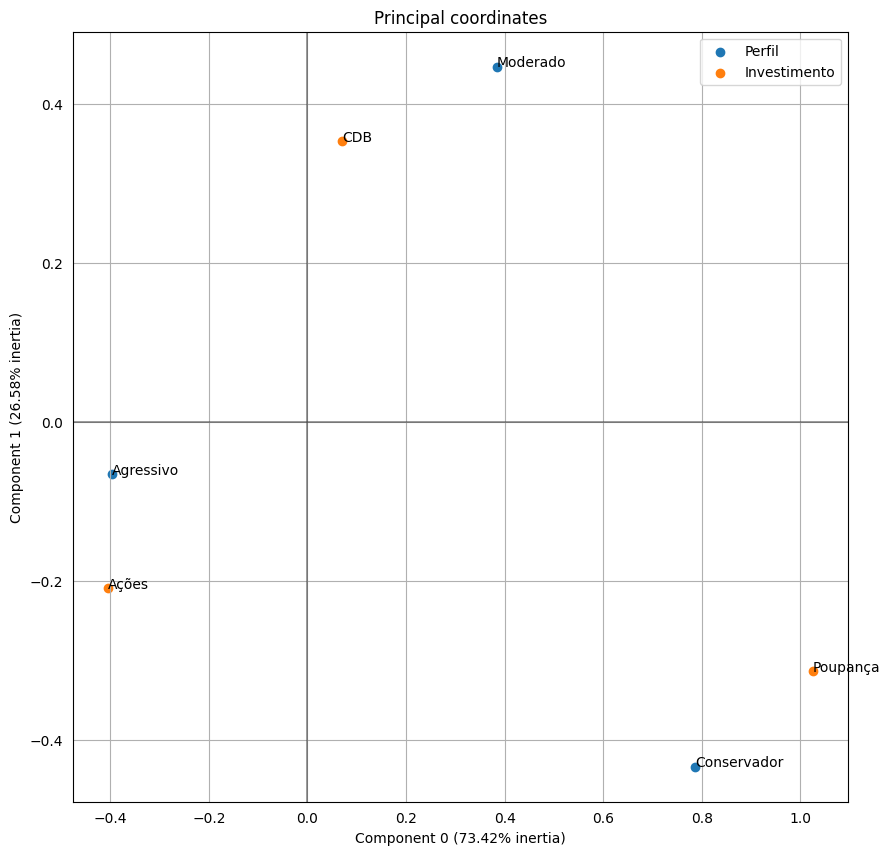

In [24]:
# Plotando o mapa perceptual
ax = ca.plot_coordinates(
    X=tabela,
    ax=None,
    figsize=(10,10),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True
)

In [25]:
# Plotando o mapa percentual interativo
import plotly.graph_objects as go
import plotly.io as pio

In [26]:
pio.renderers.default='browser'

In [27]:
chart_df = pd.DataFrame({'obs_x':ca.row_coordinates(tabela)[0].values,
                         'obs_y':ca.row_coordinates(tabela)[1].values})

In [28]:
fig = go.Figure(data=go.Scatter(x=chart_df['obs_x'],
                                y=chart_df['obs_y'],
                                name=tabela.index.name,
                                textposition='top center',
                                text=tabela.index,
                                mode='markers+text',
))

In [30]:
# Criando o gráfico interativo
fig.add_trace(go.Scatter(
    x=ca.column_coordinates(tabela)[0].values,
    mode='markers+text',
    textposition='top center',
    y=ca.column_coordinates(tabela)[1].values,
    text=ca.column_coordinates(tabela).index
))

In [31]:
# Ajustando as medidas de layout do gráfico criado acima
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
    title_text='Coordenadas principais'
)